<a href="https://colab.research.google.com/github/PhanQuangHuy123/B-i-1_AI_-Phan-Quang-Huy-20146254/blob/main/AI_W10_08_04_2023(Cifar100).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from keras import metrics
import keras
from keras.datasets import cifar100

In [13]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(y_train.shape)

class_name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
              'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
              'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
              'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
              'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 
              'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
              'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
              'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
              'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

(50000, 1)


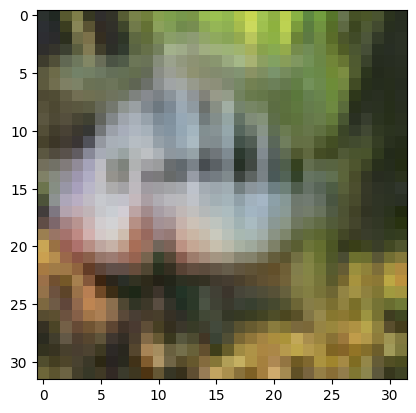

In [15]:
import matplotlib.pyplot as plt

thing = x_train[4]
plt.imshow(thing,cmap=plt.cm.binary)
plt.show()

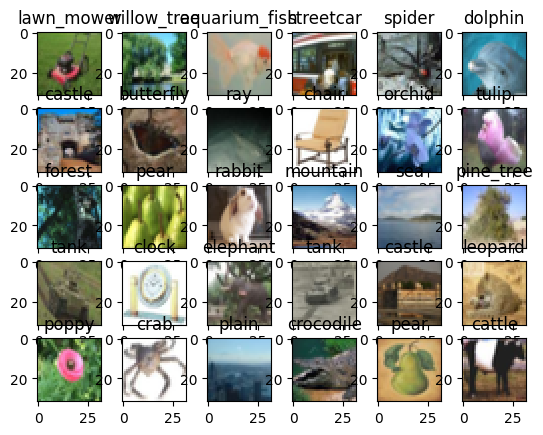

In [5]:
import matplotlib.pyplot as plt

for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[500+i])
  plt.title(class_name[int(y_train[500+i])])
plt.show()

In [6]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test/255

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
#model.add(Flatten(input_shape=[32,32,3]))

model.add(Dense(500,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
Total params: 1,716,900
Trainable params: 1,716,900
Non-trainable params: 0
_________________________________________________________________


In [9]:
from keras.metrics import sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=30)

Epoch 1/30


InvalidArgumentError: ignored